In [896]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
db = dm.read_db(base='prices_global.pkl', add=['prices_global_gwx.pkl'])
db_kr = dm.read_db(base='prices_kr.pkl', add=['prices_global.pkl'])

# Multiasset model

In [760]:
multiasset = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    n_picks=5, 
    assets=setting.assets_multiasset, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Short', 
    start='2002-12-31', 
    losscut=0.05, 
    profitake_sigma=3, 
)


10.748418807983398


In [780]:
multiasset = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    freq='M', 
    n_picks=5, 
    assets=setting.assets_multiasset, 
    sig_w_base=None, #[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([3]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(60,250), 
    follow_trend_supporter=None, #(20,60), 
    strong_condition=False, 
    market='BND_US_HY', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=3, 
)


6.848412036895752


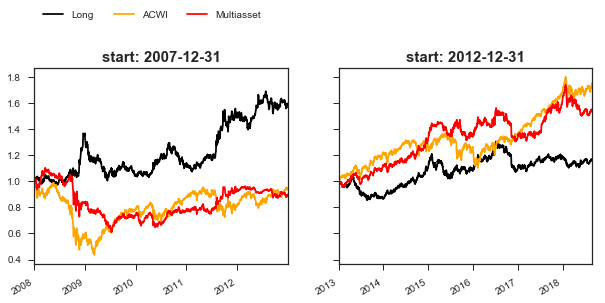

In [781]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

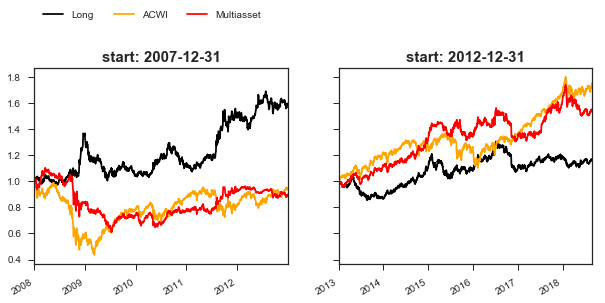

In [778]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

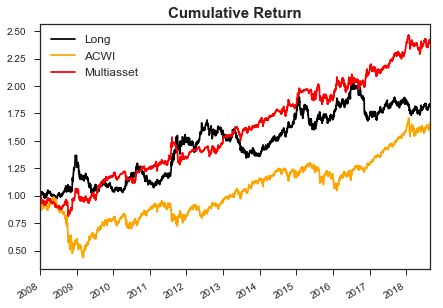

In [545]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum(strats, names=names, color=color, logy=False)

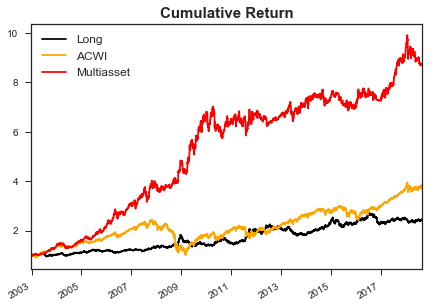

In [761]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'Multiasset']
color = ['k', 'orange', 'r']

multiasset.plot_cum(strats, names=names, color=color, logy=False)

In [546]:
rt = multiasset.cum.DualMomentum.resample('M').ffill().pct_change()
rt[rt<-0.05]

2008-10-31   -0.073382
2009-01-31   -0.092338
2009-04-30   -0.055583
2011-10-31   -0.054238
Name: DualMomentum, dtype: float64

In [666]:
multiasset.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
REIT_US,2.16,2688,7.44,33.87,0.22,-67.44,10.26,16.57,0.53,1.17,18.37,58.27,1.05,62.54
BND_US_Tbill,1.03,2688,0.30,0.57,0.53,-0.78,-0.02,0.26,-0.08,-0.00,56.99,52.76,2.26,-321.66
Developed,1.18,2688,1.55,23.95,0.06,-58.34,6.94,18.10,0.37,1.09,35.14,56.69,0.89,-38.97
BND_US_HY_Muni,1.60,2688,4.44,6.99,0.64,-28.12,5.53,6.46,1.23,0.01,23.12,71.65,0.66,76.29
DualMomentum,2.13,2688,7.30,9.51,0.77,-15.27,8.06,8.43,1.09,-0.06,16.81,64.57,1.11,80.45


In [175]:
multiasset.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
PrecMetal,2.98,3945,7.17,20.88,0.34,-55.70,7.23,19.33,0.41,0.16,36.28,54.84,1.14,40.68
USD_DOWN,0.87,2938,-1.14,8.43,-0.14,-31.61,-0.92,8.30,-0.12,0.15,56.27,52.90,0.85,1.21
US_Total,4.87,3946,10.55,18.08,0.58,-55.45,13.97,12.83,1.08,0.90,15.69,68.98,0.85,83.00
Developed,3.07,3946,7.38,21.57,0.34,-61.04,13.38,15.66,0.88,1.10,29.27,60.43,0.98,16.82
DualMomentum,13.29,3946,17.82,13.86,1.29,-16.29,16.77,12.65,1.16,0.18,5.22,63.64,1.60,86.66


In [23]:
multiasset.book

,trade_amount,value,trade_cashflow,cost,cash,nav
2002-12-31,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+08,1.000000e+08
2003-01-02,1.000000e+08,1.000000e+08,-1.000000e+08,100000.000000,-1.000000e+05,9.990000e+07
2003-01-03,0.000000e+00,1.006716e+08,0.000000e+00,0.000000,-1.000000e+05,1.005716e+08
2003-01-06,0.000000e+00,1.008344e+08,0.000000e+00,0.000000,-1.000000e+05,1.007344e+08
2003-01-07,0.000000e+00,1.008762e+08,0.000000e+00,0.000000,-1.000000e+05,1.007762e+08
2003-01-08,0.000000e+00,1.010705e+08,0.000000e+00,0.000000,-1.000000e+05,1.009705e+08
2003-01-09,0.000000e+00,1.017281e+08,0.000000e+00,0.000000,-1.000000e+05,1.016281e+08
2003-01-10,0.000000e+00,1.017811e+08,0.000000e+00,0.000000,-1.000000e+05,1.016811e+08
2003-01-13,0.000000e+00,1.020560e+08,0.000000e+00,0.000000,-1.000000e+05,1.019560e+08
2003-01-14,0.000000e+00,1.023149e+08,0.000000e+00,0.000000,-1.000000e+05,1.022149e+08


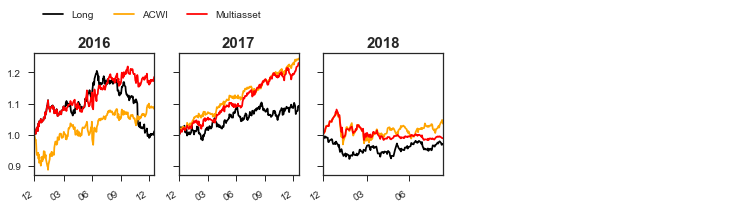

In [226]:
multiasset.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

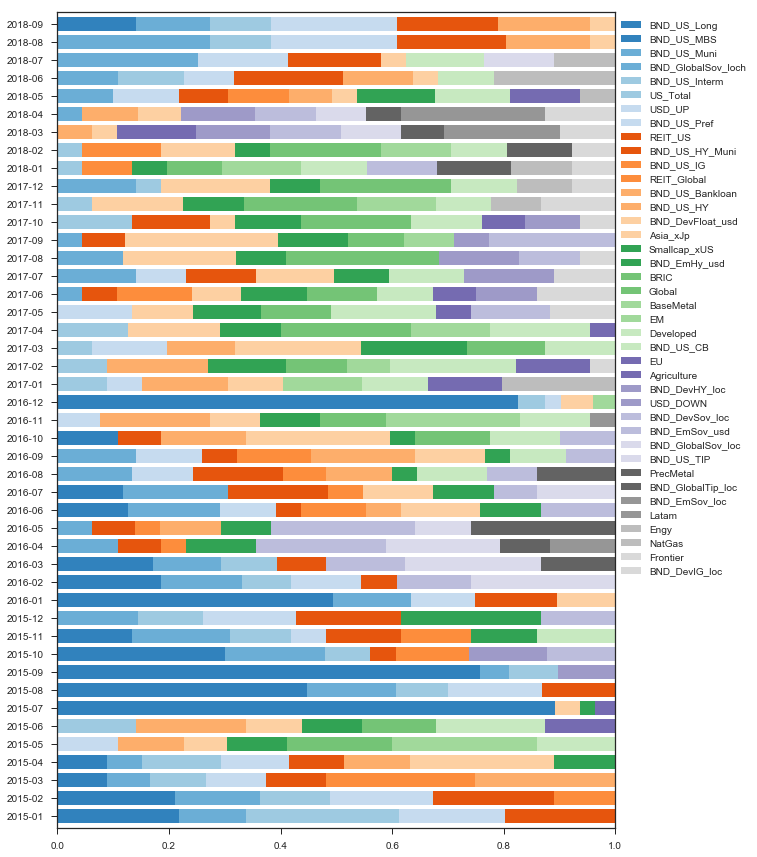

In [704]:
multiasset.plot_weight([2015, 2018])

# Global equity allocation model

In [336]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    n_picks=5, 
    assets=setting.assets_global_eq, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Short', 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=3, 
)


7.924813747406006


In [897]:
geam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    n_picks=10, 
    assets=setting.assets_global_eq, 
    sig_w_base=None, #[1,0,0,0,0,0,1,0,0,1,0,0], 
    sig_w_dynamic=True,
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=24, 
    sig_dyn_thres=0.0, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=None, #(60,250), 
    strong_condition=False, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    losscut=1.05, 
    profitake_sigma=100, 
)

> c:\users\sekan.ca-am\documents\github\model_develop\quanty\model\dual_momentum.py(273)_get_cor()
    271             cor = perf_past_rt.corrwith(perf_fut_rt, axis=1).rolling(self.sig_dyn_n_sample, min_periods=2).mean()
    272             set_trace()
--> 273             return cor
    274             #return perf_past.corrwith(perf_fut, axis=1).rolling(self.sig_dyn_n_sample, min_periods=2).mean()
    275             #return perf_past.corrwith(perf_fut, axis=1).ewm(halflife=250).mean()

ipdb> cor
2001-01-02         NaN
2001-01-03         NaN
2001-01-04         NaN
2001-01-05         NaN
2001-01-08         NaN
2001-01-09         NaN
2001-01-10         NaN
2001-01-11         NaN
2001-01-12         NaN
2001-01-16         NaN
2001-01-17         NaN
2001-01-18         NaN
2001-01-19         NaN
2001-01-22         NaN
2001-01-23         NaN
2001-01-24         NaN
2001-01-25         NaN
2001-01-26         NaN
2001-01-29         NaN
2001-01-30         NaN
2001-01-31         NaN
2001-02-01    

[4445 rows x 41 columns]
ipdb> n_back
504
ipdb> perf_past_rt.corrwith(perf_fut_rt, axis=1)
2001-01-02         NaN
2001-01-03         NaN
2001-01-04         NaN
2001-01-05         NaN
2001-01-08         NaN
2001-01-09         NaN
2001-01-10         NaN
2001-01-11         NaN
2001-01-12         NaN
2001-01-16         NaN
2001-01-17         NaN
2001-01-18         NaN
2001-01-19         NaN
2001-01-22         NaN
2001-01-23         NaN
2001-01-24         NaN
2001-01-25         NaN
2001-01-26         NaN
2001-01-29         NaN
2001-01-30         NaN
2001-01-31         NaN
2001-02-01         NaN
2001-02-02         NaN
2001-02-05         NaN
2001-02-06         NaN
2001-02-07         NaN
2001-02-08         NaN
2001-02-09         NaN
2001-02-12         NaN
2001-02-13         NaN
                ...   
2018-07-23   -0.290496
2018-07-24   -0.117605
2018-07-25   -0.153274
2018-07-26   -0.113671
2018-07-27   -0.119730
2018-07-30   -0.104548
2018-07-31   -0.051265
2018-08-01   -0.072388
2018-08-02  

[1947 rows x 41 columns]
ipdb> perf_past_rt.loc[:'2008-09-30'].to_excel('perf.xlsx', 'sheet')
ipdb> perf_fut_rt.loc[:'2008-09-30'].to_excel('perf_fut.xlsx', 'sheet')
ipdb> q


BdbQuit: 

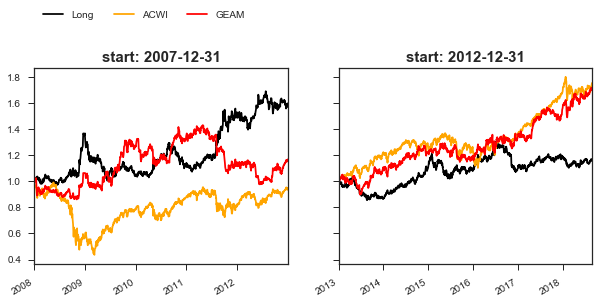

In [582]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

In [832]:
geam.port.selector.selection.to_excel('selection.xlsx', 'sheet')

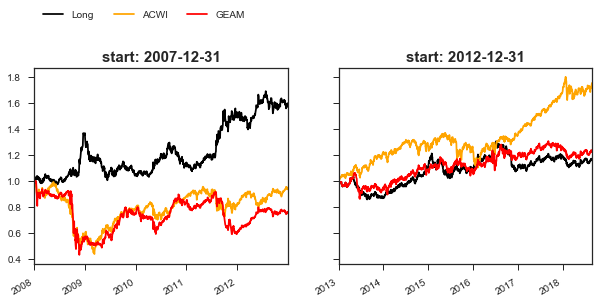

In [885]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

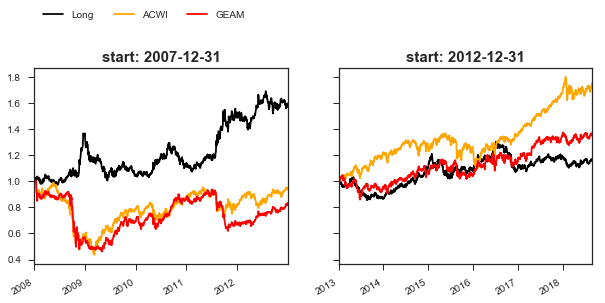

In [895]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

In [821]:
geam.book.to_excel('book.xlsx','sheet')

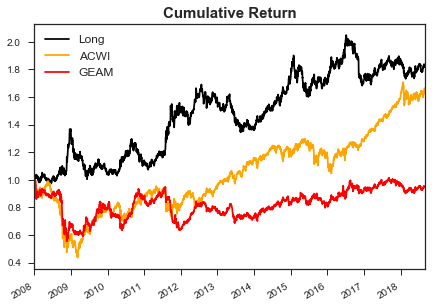

In [825]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [411]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Tbill,1.03,2688,0.30,0.57,0.53,-0.78,-0.02,0.26,-0.08,-0.00,56.99,52.76,2.26,-321.66
Mexico,1.07,2688,0.67,28.42,0.02,-64.62,0.90,22.33,0.04,1.11,47.64,53.54,1.00,10.50
Thailand,2.41,2630,8.72,28.30,0.31,-64.22,15.63,22.96,0.78,0.96,25.33,59.68,0.98,62.71
Colombia,1.54,2409,4.61,22.57,0.20,-68.71,5.18,22.37,0.25,0.71,41.44,56.64,1.01,-185.33
DualMomentum,2.78,2688,9.97,14.54,0.69,-20.23,11.51,14.02,0.84,0.13,8.98,56.69,1.42,96.16


In [829]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Tbill,1.03,2688,0.30,0.57,0.53,-0.78,-0.02,0.26,-0.08,-0.00,56.99,52.76,2.26,-321.66
Mexico,1.07,2688,0.67,28.42,0.02,-64.62,0.90,22.33,0.04,1.11,47.64,53.54,1.00,10.50
Thailand,2.41,2630,8.72,28.30,0.31,-64.22,15.63,22.96,0.78,0.96,25.33,59.68,0.98,62.71
Colombia,1.54,2409,4.61,22.57,0.20,-68.71,5.18,22.37,0.25,0.71,41.44,56.64,1.01,-185.33
DualMomentum,0.95,2688,-0.52,17.46,-0.03,-44.63,5.01,15.22,0.34,0.40,37.31,55.12,0.87,-136.62


In [180]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Indonesia,8.79,3946,14.77,29.99,0.49,-72.14,17.52,28.43,0.68,0.67,28.00,61.50,1.05,37.32
Colombia,1.54,2409,4.61,22.57,0.20,-68.71,5.18,22.37,0.25,0.71,41.44,56.64,1.01,-185.33
Poland,1.02,2126,0.22,28.24,0.01,-52.81,2.84,24.28,0.12,1.35,47.10,48.00,1.22,3.55
Spain,3.06,3946,7.34,28.00,0.26,-61.19,12.24,22.99,0.54,1.25,38.08,57.75,1.02,-95.50
DualMomentum,8.53,3946,14.55,15.77,0.92,-23.46,14.22,15.74,0.91,0.23,12.96,61.50,1.30,90.01


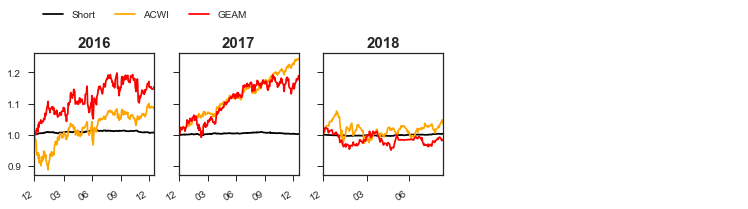

In [181]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

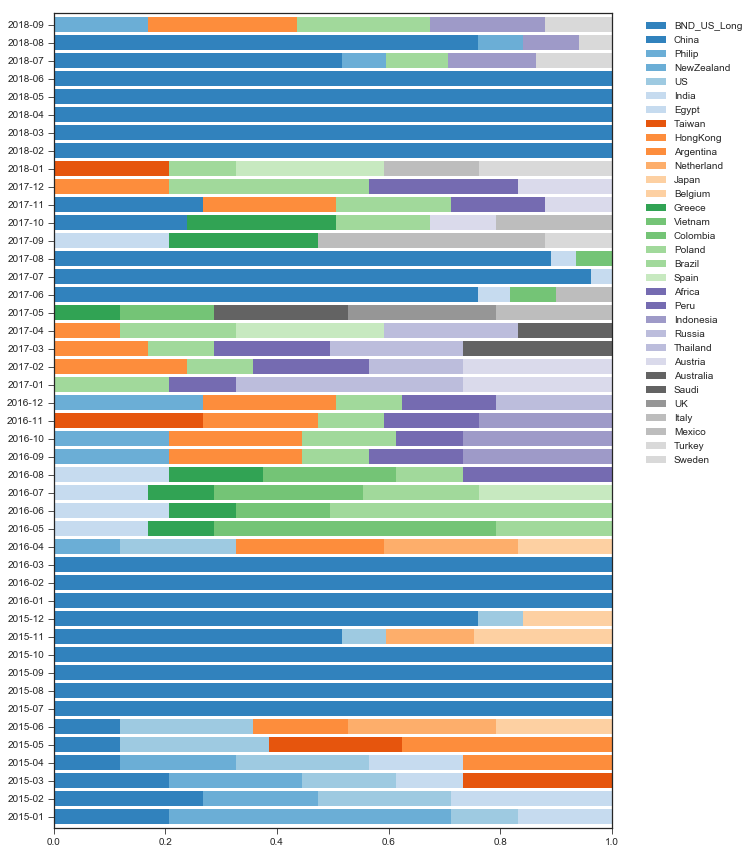

In [300]:
geam.plot_weight([2015, 2018])

# Global sector allocation model

In [9]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,0,0,0], 
    sig_w_dynamic=True, #False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(20,60), 
    strong_condition=True, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_AGG', 
    start='2013-12-31', 
    losscut=0.05,
    profitake_sigma=3, 
)

HBox(children=(IntProgress(value=0, max=57), HTML(value='')))

C:\Users\Sejin\Anaconda3\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)



14.562439203262329


In [429]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    n_picks=10, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    sig_w_dynamic=False, 
    sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=24, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=None, #(20,60), 
    strong_condition=False, 
    market='ACWI', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Tbill', 
    start='2007-12-31', 
    losscut=1.05,
    profitake_sigma=20, 
)


9.001215696334839


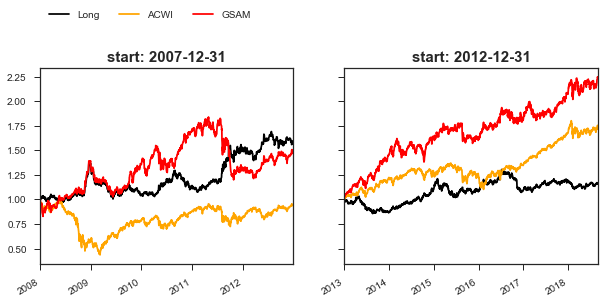

In [430]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

In [440]:
assets_ = gsam.weight.loc['2011-08'].iloc[0][gsam.weight.loc['2011-08'].iloc[0]!=0].index; assets_

Index(['HealthcareService', 'NaturalGas', 'Exploration', 'FoodBeverage',
       'MedicalDevice', 'Gaming', 'Pharma', 'OilService', 'Cloud',
       'SilverMiner'],
      dtype='object')

In [451]:
(gsam.p_close[assets_].loc['2011-08-04']/gsam.p_close[assets_].loc['2011-08-03']-1)

HealthcareService   -0.045745
NaturalGas          -0.067624
Exploration         -0.083208
FoodBeverage        -0.051031
MedicalDevice       -0.046301
Gaming              -0.068515
Pharma              -0.054344
OilService          -0.092065
Cloud               -0.050182
SilverMiner         -0.102817
dtype: float64

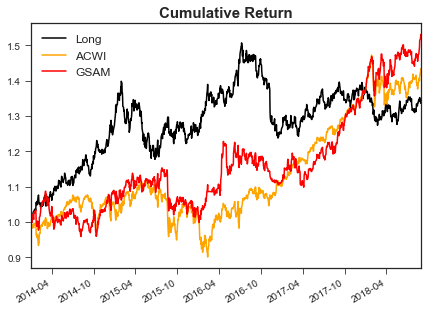

In [393]:
strats = ['BND_US_Long', 'ACWI', 'DualMomentum']
names = ['Long', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

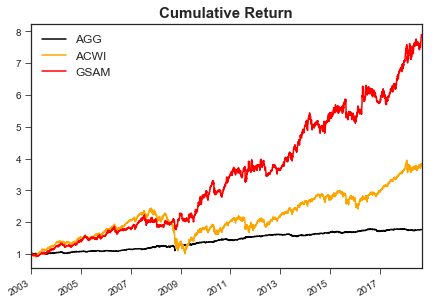

In [387]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GSAM']
color = ['k', 'orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=False)

In [368]:
gsam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
CommunityBank,1.66,1177,11.34,19.14,0.59,-22.48,11.26,19.46,0.60,0.94,9.91,58.18,1.26,76.12
Cybersecurity,1.33,806,9.19,17.47,0.53,-35.73,18.17,14.94,1.37,1.01,7.36,64.86,1.07,-8.28
Software,2.49,1177,21.36,17.44,1.22,-21.51,21.92,17.31,1.31,1.08,2.80,58.18,2.23,87.78
CapitalMarket,1.29,1177,5.64,19.33,0.29,-36.16,9.23,18.07,0.55,1.20,35.45,63.64,0.81,7.88
DualMomentum,1.61,1177,10.66,12.94,0.82,-13.96,10.57,12.89,0.81,0.60,16.59,61.82,1.45,80.22


In [185]:
gsam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ConsumerGoods,4.02,3946,9.21,14.45,0.64,-42.64,11.48,11.49,0.99,0.64,13.01,63.10,1.12,91.95
Solar,0.60,3381,-3.73,45.23,-0.08,-96.10,-1.93,40.03,-0.05,1.58,51.88,51.88,1.06,-2.23
Semiconductor,6.23,3946,12.30,27.46,0.45,-66.85,13.75,23.50,0.56,1.07,32.49,57.75,1.15,56.09
OnlineRetail,4.70,1953,21.92,16.46,1.33,-22.40,19.32,14.90,1.32,0.83,6.75,72.83,1.27,94.18
DualMomentum,7.90,3946,13.99,15.13,0.92,-20.69,13.94,13.65,0.98,0.35,9.44,62.03,1.31,97.78


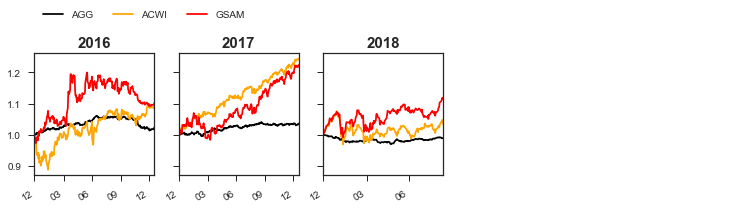

In [186]:
gsam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

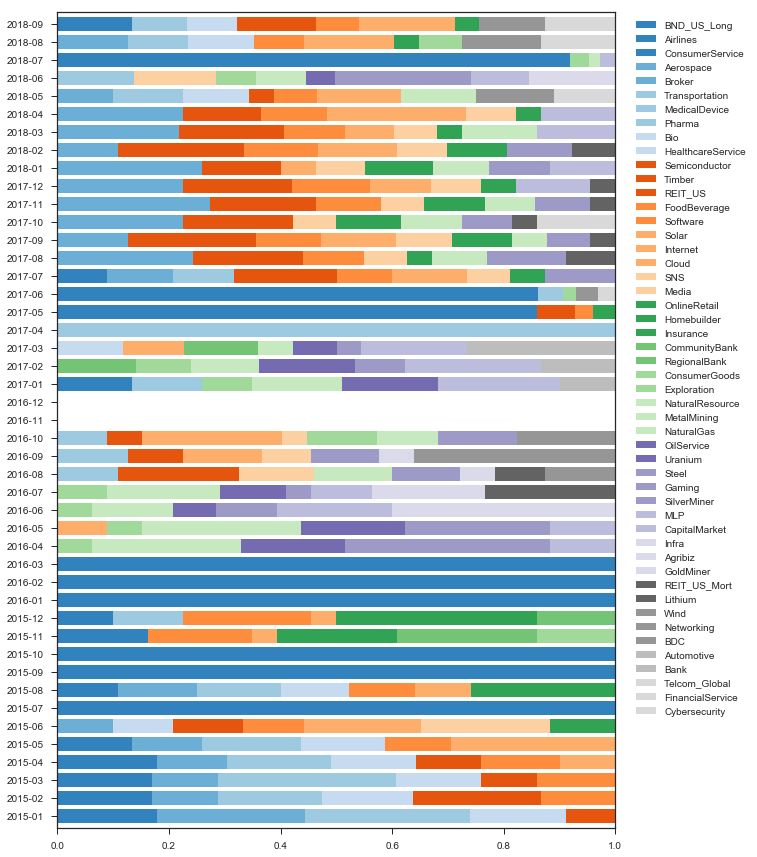

In [187]:
gsam.plot_weight([2015, 2018])

# Global fixed-income allocation model

In [641]:
gfam = q.Backtester(
    setting.base_params(db), 
    w_type='ranky2', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=False, 
    #sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_AGG', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Short', 
    start='2013-12-31', 
    losscut=0.05, 
    profitake_sigma=10, 
)


2.761204719543457


In [764]:
gfam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_fi, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=False, 
    #sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='BND_US_AGG', #'BND_GlobalSov_loch', #'BND_US_AGG', 
    supporter='BND_US_Long', 
    cash_equiv='BND_US_Short', 
    start='2007-12-31', 
    losscut=0.05, 
    profitake_sigma=10, 
)


6.943012237548828


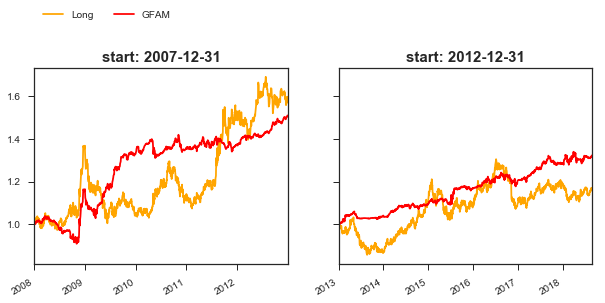

In [766]:
strats = ['BND_US_Long', 'DualMomentum']
names = ['Long', 'GFAM']
color = ['orange', 'r']

gfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

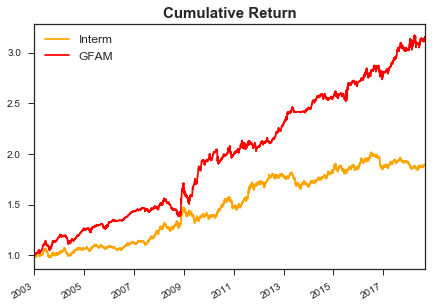

In [189]:
strats = ['BND_US_Interm', 'DualMomentum']
names = ['Interm', 'GFAM']
color = ['orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

In [156]:
gfam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_DevSov_loc,1.83,3946,3.91,8.91,0.44,-15.77,3.48,8.67,0.41,0.07,31.89,57.75,1.07,45.35
BND_US_Muni,1.51,2771,3.80,5.31,0.72,-12.33,3.48,3.94,0.83,0.00,18.99,64.12,1.04,93.08
BND_EmSov_usd,3.19,3946,7.63,9.35,0.82,-34.70,8.23,6.69,1.41,0.14,17.72,68.98,0.90,87.03
BND_US_Interm,1.89,3946,4.12,6.58,0.63,-10.40,4.68,6.07,0.73,-0.13,23.80,55.61,1.37,93.93
DualMomentum,3.15,3946,7.55,6.16,1.23,-12.06,5.97,5.36,1.22,0.02,2.89,66.84,1.29,97.19


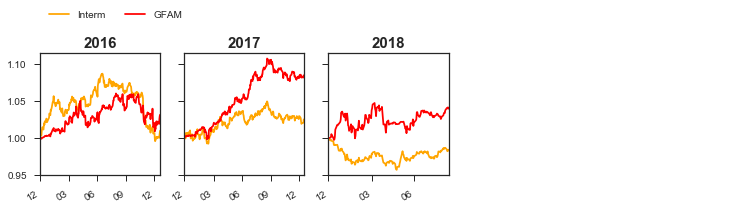

In [191]:
gfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2016))

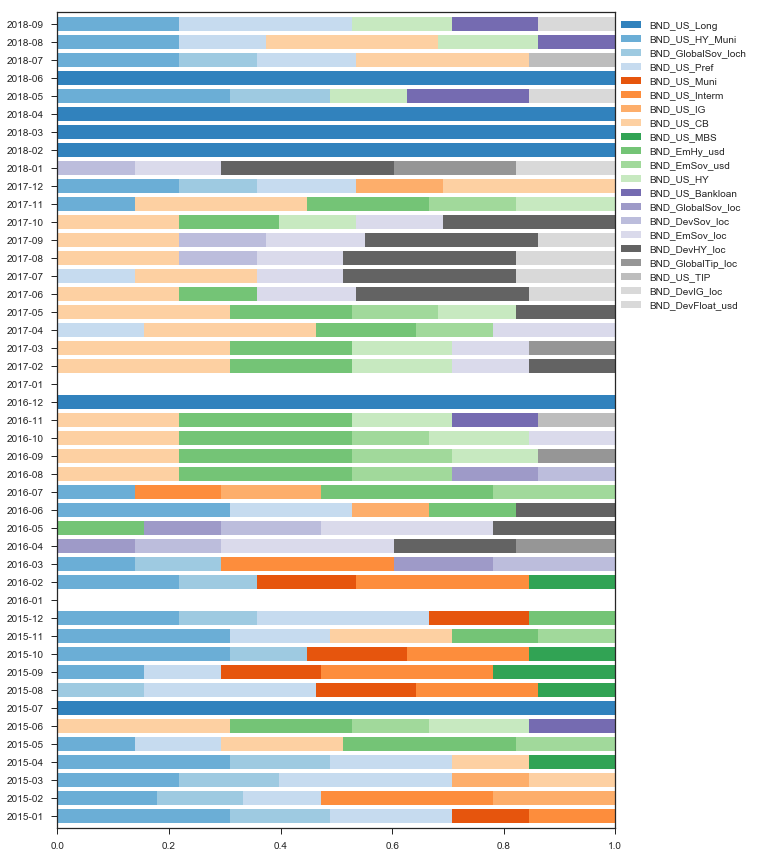

In [192]:
gfam.plot_weight([2015, 2018])

In [838]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Korea factor allocation model

In [646]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # ranky2 가 더 잘나오긴 한다. ----
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, #|setting.assets_us_factor2, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    #trade_assets=[('K200', {'K200L':0.5})], 
    start='2013-12-31', 
    losscut=0.03, 
    profitake_sigma=10, 
)


2.4804041385650635


In [792]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # ranky2 가 더 잘나오긴 한다. ----
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, #|setting.assets_us_factor2, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    #trade_assets=[('K200', {'K200L':0.5})], 
    start='2007-12-31', 
    losscut=0.03, 
    profitake_sigma=10, 
)


5.865610361099243


In [843]:
kfam = q.Backtester(
    setting.base_params(db_kr), 
    w_type='inv_ranky2', # ranky2 가 더 잘나오긴 한다. ----
    freq='1M', 
    n_picks=5, 
    assets=setting.assets_kr_factor, #|setting.assets_us_factor2, 
    sig_w_base=None, #[1,0,0,0,0,0,1,0,0,1,2,3], 
    sig_w_dynamic=True, 
    sig_dyn_fwd=21*np.array([1,2,3]), 
    #sig_dyn_m_backs=12, 
    follow_trend=None, #(20,60), 
    follow_trend_market=None, #(20,60), 
    follow_trend_supporter=None, #(60,250), 
    strong_condition=False, 
    market='K200', 
    supporter='KTB10YL', 
    cash_equiv= 'KTB10Y', 
    #trade_assets=[('K200', {'K200L':0.5})], 
    start='2007-12-31', 
    losscut=1.03, 
    profitake_sigma=10, 
)

> c:\users\sekan.ca-am\documents\github\model_develop\quanty\model\dual_momentum.py(377)_get_default_selection()
    375 
    376         if date==pd.Timestamp('2008-09-30'): set_trace()
--> 377         if self.mode=='DualMomentum':
    378             pos = (score>0) & (ranks<=n_picks)
    379             #if self.market is not None:

ipdb> score
Momentum_kr         NaN
MomentumGrowth_kr   NaN
Quality_kr          NaN
K200L               NaN
DvdGrowth_kr        NaN
HighBeta_kr         NaN
ESG_kr              NaN
K200                NaN
KTB10YL             NaN
KTB10Y              NaN
Growth_kr           NaN
HighDvd_kr          NaN
LowVol_kr           NaN
Turnaround_kr       NaN
Contrarian_kr       NaN
Value_kr            NaN
Name: 2008-09-30 00:00:00, dtype: float64
ipdb> sig
Momentum_kr               NaN
MomentumGrowth_kr    0.029088
Quality_kr          -0.183460
K200L                     NaN
DvdGrowth_kr              NaN
HighBeta_kr         -0.477931
ESG_kr                    NaN
K200

[129 rows x 16 columns]
ipdb> q


BdbQuit: 

In [835]:
kfam.port.selector.sig

,Momentum_kr,MomentumGrowth_kr,Quality_kr,K200L,DvdGrowth_kr,HighBeta_kr,ESG_kr,K200,KTB10YL,KTB10Y,Growth_kr,HighDvd_kr,LowVol_kr,Turnaround_kr,Contrarian_kr,Value_kr
2007-12-31,NaN,-0.702559,-0.362350,NaN,NaN,-0.340215,NaN,-0.268253,0.077555,0.018617,-0.466501,-0.328740,-0.341310,NaN,-0.476811,-0.372346
2008-01-31,NaN,-2.438890,-1.085159,NaN,NaN,-0.186288,NaN,-0.415249,-0.278053,-0.322648,-1.286441,-1.053904,-1.365938,NaN,-1.248066,-0.950915
2008-02-29,NaN,-3.047066,-0.977901,NaN,NaN,-0.660983,NaN,-0.442553,-0.362442,-0.350797,-1.273188,-0.959127,-1.001533,NaN,-1.838251,-0.771745
2008-03-31,NaN,0.706965,0.391212,NaN,NaN,0.342394,NaN,0.299626,-0.085646,-0.032115,0.497681,0.389664,0.337129,NaN,0.489742,0.429524
2008-04-30,NaN,1.396337,0.594661,NaN,NaN,0.442153,NaN,0.388848,0.066425,0.099548,0.779481,0.508143,0.671850,NaN,0.871303,0.542735
2008-05-30,NaN,1.570472,0.664794,NaN,NaN,0.494128,NaN,0.443453,0.027099,0.087122,0.879971,0.650313,0.710657,NaN,1.084553,0.626819
2008-06-30,NaN,1.360936,0.583673,NaN,NaN,0.411641,NaN,0.403033,-0.004126,0.060678,0.770481,0.608743,0.638912,NaN,0.937561,0.570620
2008-07-31,NaN,1.689998,0.595491,NaN,NaN,0.321049,NaN,0.268661,-0.105768,0.055303,0.776022,0.649696,0.713703,NaN,1.021436,0.538599
2008-08-29,NaN,0.817086,0.069291,NaN,NaN,-0.291046,NaN,-0.195027,-0.139118,0.045224,0.203683,0.215401,0.345874,NaN,0.175979,-0.027855
2008-09-30,NaN,0.029088,-0.183460,NaN,NaN,-0.477931,NaN,-0.403912,-0.039970,0.057898,-0.247262,-0.201333,-0.102499,NaN,-0.194536,-0.361052


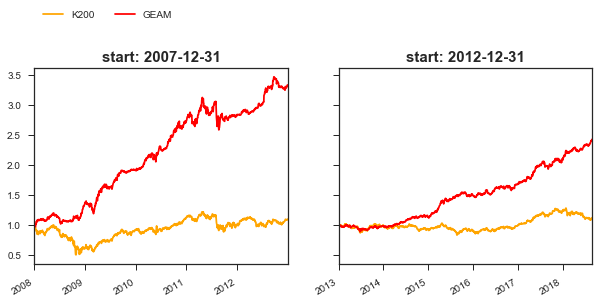

In [793]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

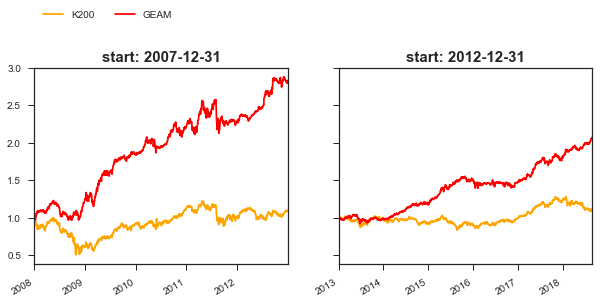

In [795]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum_multi_periods(strats, names=names, color=color, logy=False, separator=['2012-12-31'])

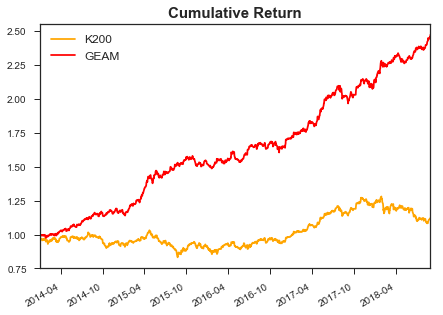

In [647]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)

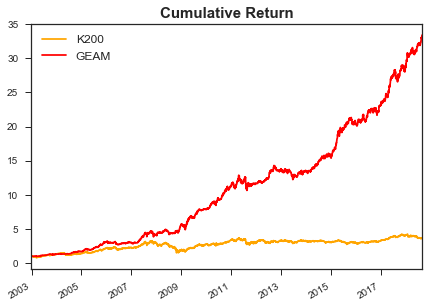

In [219]:
strats = ['K200', 'DualMomentum']
names = ['K200', 'GEAM']
color = ['orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)

In [220]:
kfam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
KTB10Y,2.05,4064,4.53,5.33,0.85,-9.78,5.00,4.77,0.85,-0.01,23.49,67.38,0.95,94.24
Momentum_kr,3.72,1728,20.95,19.19,1.09,-35.89,25.25,18.24,1.31,0.20,25.35,67.95,1.16,79.19
ESG_kr,1.30,1512,4.40,10.82,0.41,-16.82,6.09,10.02,0.61,0.19,36.03,57.97,1.09,47.96
Value_kr,7.35,4064,13.06,20.90,0.62,-57.56,9.74,18.44,0.61,0.33,23.22,58.82,1.22,39.89
DualMomentum,33.39,4064,24.09,13.02,1.85,-18.30,23.50,12.06,2.17,0.09,8.96,71.66,1.53,94.08


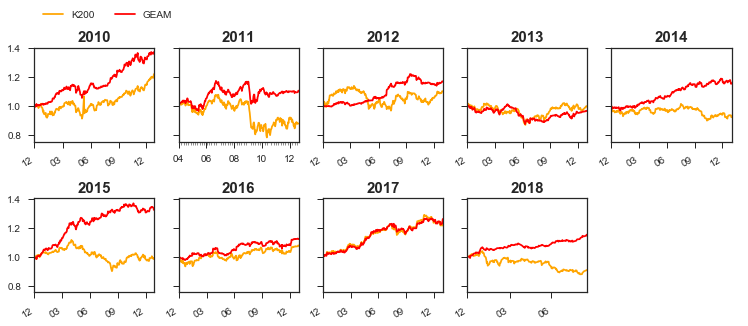

In [213]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2010))

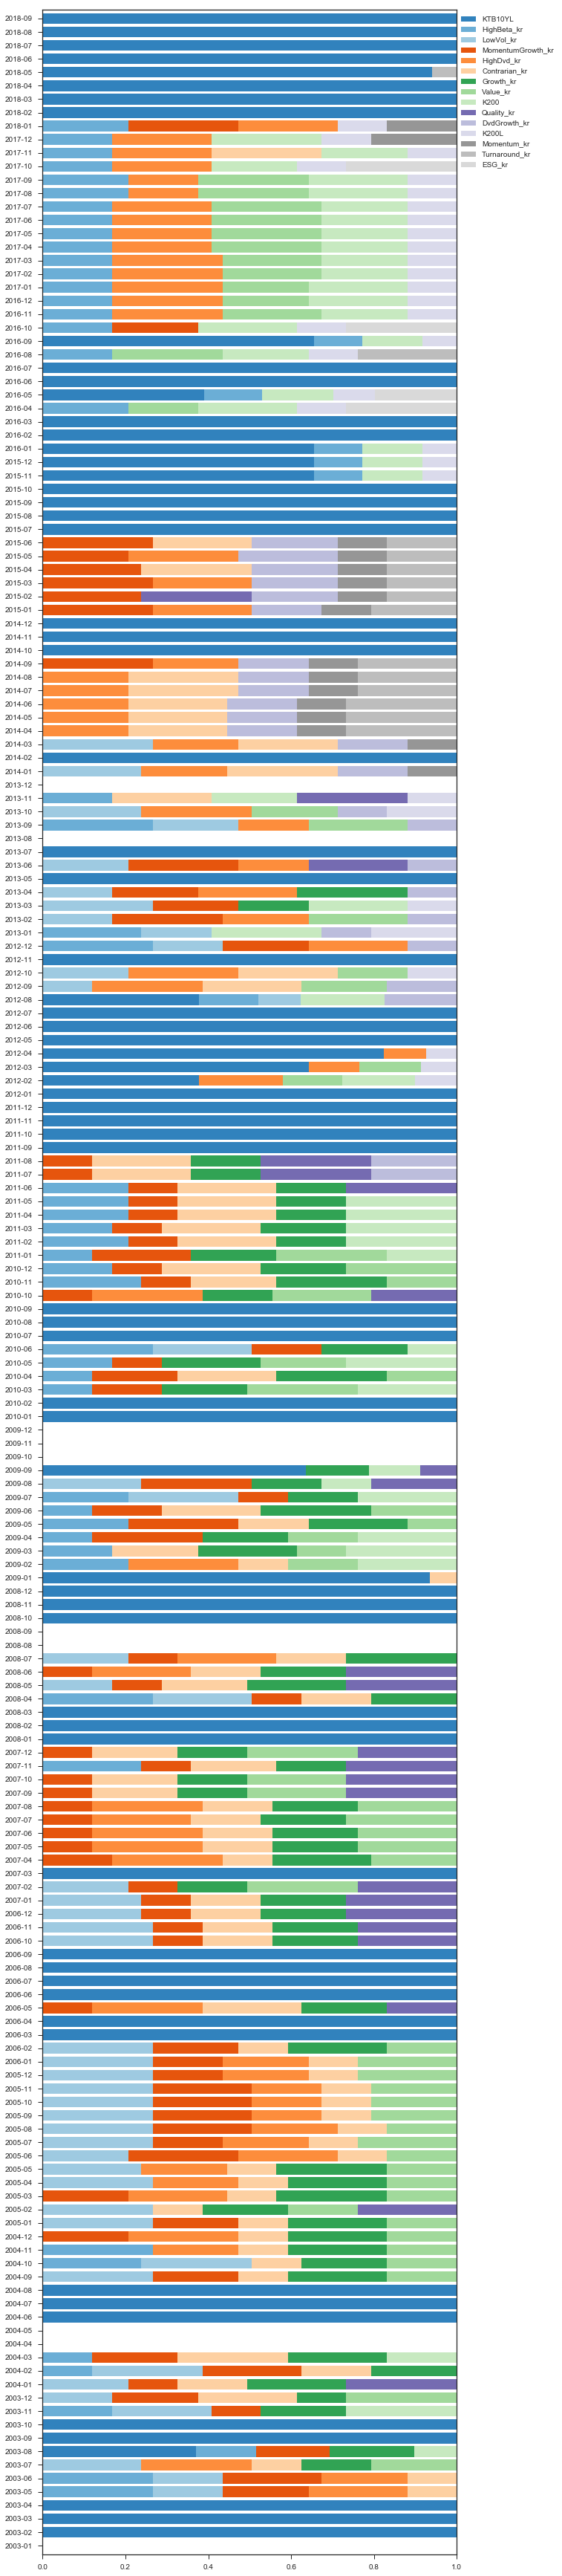

In [214]:
kfam.plot_weight([2003, 2018])

In [398]:
mix = q_base.BacktestComparator(setting.base_params(db), multiasset=multiasset, geam=geam, kfam=kfam, gsam=gsam, gfam=gfam)
mix.mix()

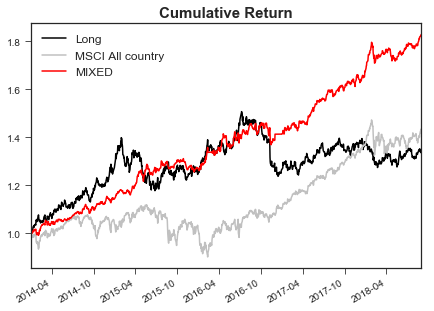

In [399]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

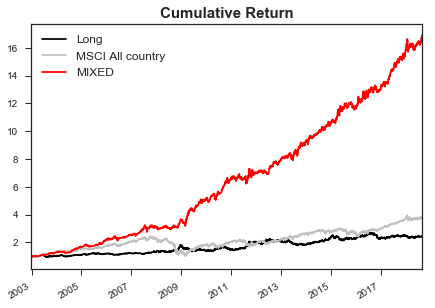

In [222]:
strats = ['BND_US_Long', 'ACWI', 'mixed']
names = ['Long', 'MSCI All country', 'MIXED']
color = ['k', 'silver', 'r']

mix.plot_cum(strats, names=names, color=color, logy=False)

In [168]:
mix.stats.tail(6)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
multiasset,13.29,3946,17.82,13.86,1.29,-16.29,16.77,12.65,1.16,0.18,5.22,63.64,1.60,86.66
geam,8.53,3946,14.55,15.77,0.92,-23.46,14.22,15.74,0.91,0.23,12.96,61.50,1.30,90.01
kfam,33.37,3946,24.89,13.22,1.88,-18.30,24.29,12.20,2.16,0.09,8.14,71.66,1.50,94.06
gsam,7.90,3946,13.99,15.13,0.92,-20.69,13.94,13.65,0.98,0.35,9.44,62.03,1.31,97.78
gfam,3.15,3946,7.55,6.16,1.23,-12.06,5.97,5.36,1.22,0.02,2.89,66.84,1.29,97.19
mixed,16.92,3946,19.63,10.23,1.92,-15.42,17.48,9.38,2.07,0.19,1.65,71.12,1.62,96.72


In [42]:
mix.stats.tail(6)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
multiasset,1.36,1177,6.82,9.46,0.72,-11.38,8.44,9.44,0.90,0.23,17.03,58.18,1.57,82.13
geam,1.38,1177,7.12,10.95,0.65,-12.85,9.13,10.55,0.76,0.29,24.57,61.82,1.29,72.51
kfam,1.93,1177,14.97,6.21,2.41,-4.11,14.45,5.99,2.52,0.02,0.00,81.82,1.81,94.15
gsam,1.48,1177,8.75,11.93,0.73,-11.56,9.29,12.57,0.72,0.49,7.54,60.00,1.37,86.47
gfam,1.26,1177,5.02,4.58,1.10,-4.21,5.08,4.83,1.05,0.07,3.02,65.45,1.44,95.42
mixed,1.56,1177,9.97,5.95,1.68,-3.99,9.81,5.84,1.75,0.20,0.00,70.91,1.83,98.28


In [400]:
mix.stats.tail(6)

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
multiasset,1.70,1177,11.87,9.29,1.28,-13.23,14.18,9.65,1.41,0.15,2.48,74.55,1.18,93.29
geam,1.88,1177,14.31,12.67,1.13,-8.99,13.72,12.51,1.10,0.30,0.75,65.45,1.51,95.55
kfam,2.47,1177,21.24,8.60,2.47,-6.23,23.05,9.02,2.58,0.03,0.00,80.00,1.99,97.48
gsam,1.53,1177,9.44,13.36,0.71,-13.37,8.24,13.21,0.58,0.59,14.66,61.82,1.23,76.80
gfam,1.29,1177,5.52,5.19,1.06,-4.83,5.61,5.47,1.04,0.07,3.23,65.45,1.41,95.15
mixed,1.83,1177,13.69,6.94,1.97,-6.28,12.82,6.86,1.85,0.21,0.00,76.36,1.52,97.97


In [43]:
rt = mix.cum.mixed.resample('M').ffill().pct_change()#.plot.bar()
rt[rt<-0.05]

Series([], Freq: M, Name: mixed, dtype: float64)

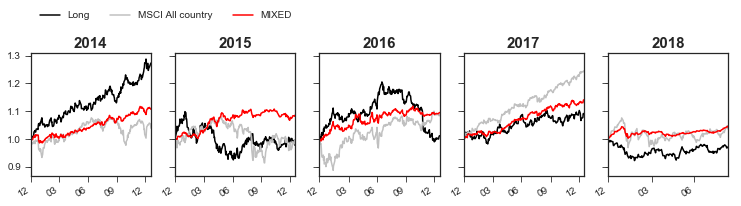

In [45]:
mix.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2013))